In [47]:
import pandas as pd
import numpy as np

relevent_assessments_list = ["WISC", "TOWRE", "WIAT"]

# LORIS saved query (all data)
full = pd.read_csv("../../diagnosis_predictor/data/raw/LORIS-release-10.csv", dtype=object)

In [50]:
import sys
sys.path.append("helpers")
from helpers import LORIS_data_preparation

df = LORIS_data_preparation.prepare_data(full)

read = "WIAT,WIAT_Word_Stnd"
towre = "TOWRE,TOWRE_Total_Scaled"
psi = "WISC,WISC_PSI"
relevant_columns = [read, towre, psi]

df = df[relevant_columns].sort_values(by="WIAT,WIAT_Word_Stnd")

# Convert to numeric, assign cells with text to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    
# Drop rows with one of the values missing 
df = df.dropna()

/Users/home/Repos/hbn/HBN-scripts/exploration/helpers/LORIS_data_preparation.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full["ID"] = full_for_EID_check.iloc[:, 0]


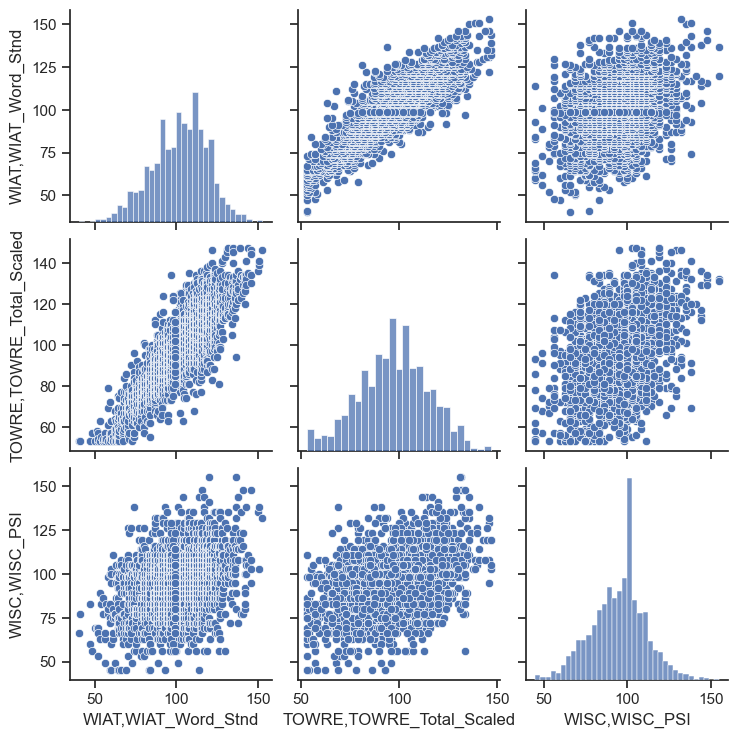

In [46]:
import seaborn as sns

# Create scatter plots for each pair of columns
sns.set(style="ticks")
sns.pairplot(df)

<AxesSubplot: xlabel='WIAT,WIAT_Word_Stnd', ylabel='TOWRE,TOWRE_Total_Scaled'>

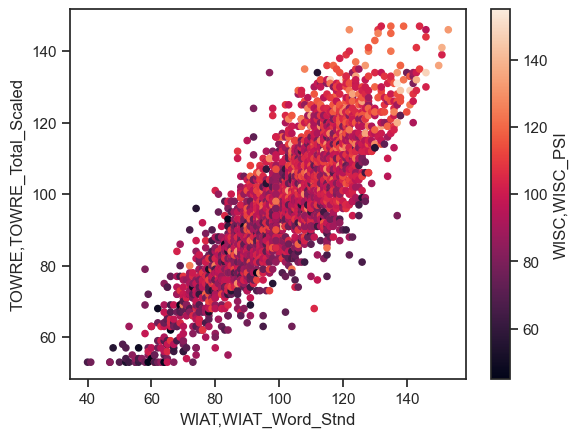

In [20]:
df.plot.scatter(read, towre, color=psi)

In [39]:
# Processing speed of people with high WIAT but low TOWRE (expected to be low) 
df[(df[read] > 115) & (df[towre] < 85)]

,"WIAT,WIAT_Word_Stnd","TOWRE,TOWRE_Total_Scaled","WISC,WISC_PSI"
579,122.0,83.0,72.0
2103,126.0,81.0,66.0


<AxesSubplot: ylabel='Frequency'>

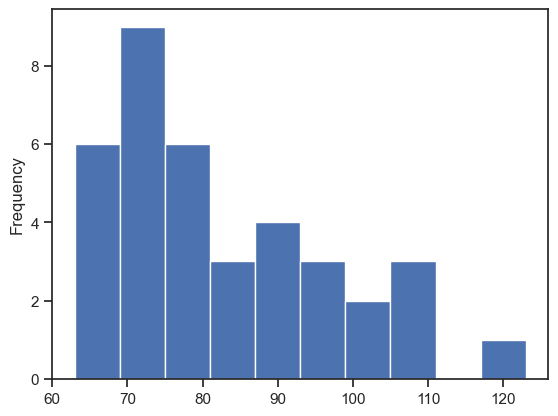

In [36]:
df[(df[read] > 100) & (df[towre] < 85)][psi].plot.hist()

<AxesSubplot: ylabel='Frequency'>

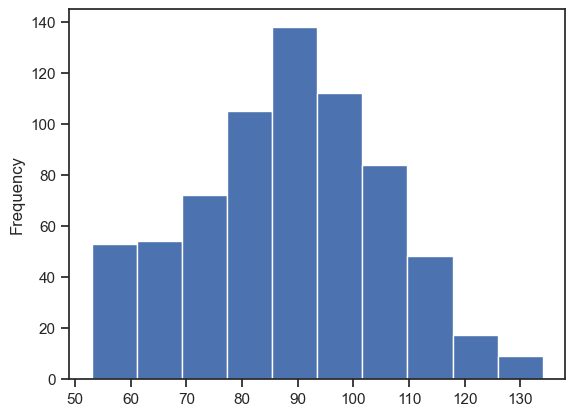

In [40]:
# TOWRE of people with low PS (expected to be lower than with any PS)
df[df[psi] < 85][towre].plot.hist()